In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

import Module as mod

In [3]:
import plt_conf as conf
conf.general()  # cargando configuración general

A continuación veamos como resolver numéricamente (usando diferencias finitas) la ecuación de Klein-Gordon en 1+1 dimensión 
$$
u_{tt} = u_{xx} + V'(u) + f(x, t) \tag{A}
$$

### Discretizando el dominio

Para la resolución del problema tenemos que discretizar nuestro dominio temporal por ejemplo $[t_{min}, t_{max}]$ y espacial $[x_{min}, x_{max}]$, es decir:
$$
t_{min}=t_0<t_1< t_2< \dots < t_{N_t-1} < t_{N_t}=t_{max}, \qquad x_{min}=x_0<x_1< x_2< \dots < x_{N_x-1} < t_{N_x}=x_{max},
$$ 

lo que nos lleva a construir una *malla* bidimensional correspondiente al plano $x, t$, cuyas cordenadas serían $(x_i, t_n)$, con $i=0,\dots, N_x$ y $n=0,\dots, N_t$.


**IMPLEMENTACION:** Para la implementación es recomendable definir: 
$$
x_i = x_0 + i\triangle x, \quad t_n = t_0 + n \triangle t
$$

donde $\triangle x, \triangle t$ representan el ancho de las mallas espaciales y temporales respectivamente.

### Discretizando la solución

Tendremos que la solución $u(x, t)$ estará discretizada, es decir, evaluada en la malla $2D$. Por simplicidad es usual introducir la notación $u_{i}^{n}$ para indicar la solución aproximada en el punto $(x_i, t_n)$.

### Discretizando la ecuación diferencial

Antes de proceder a nuestro problema de interés, consideremos discretizar el ecuación diferencial 

$$
\frac{\partial^2 u}{\partial t^2}=\frac{\partial^2 u}{\partial x^2},
$$

con condiciones de fronteras e iniciales:
\begin{align}
u(x, 0)& = u_0(x), \qquad x\in [0, L],\\
u_t(x, 0)& = 0, \qquad x\in [0, L],\\
u(0, t)&=0, \qquad t>0,\\
u(L, t)&=0, \qquad t>0.
\end{align}

Para ello remplazaremos la segunda derivada por su aproximación de segundo orden de la diferencia central:
$$
\frac{\partial^2}{\partial t^2}u(x_i, t_n)\approx \frac{u_{i}^{n+1}-2u_{i}^{n}+u_{i}^{n-1}}{\triangle t^2}=[D_tD_t u]^{n}_{i}.
$$

Finalmente tendremos que:
\begin{align}
\frac{u_{i}^{n+1}-2u_{i}^{n}+u_{i}^{n-1}}{\triangle t^2}&= \frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\triangle x^2}.
\end{align}

Que abreviado se escribiría como:
$$
[D_tD_t u = D_xD_x u]^{n}_{i}.
$$

Ahora nuestro objetivo es encontrar $u_{i}^{n+1}$, es decir evolucionar en el tiempo toda la malla espacial, para ello debemos despejar este término en la versión discreta de la ecuación diferencial, quedando 
$$
u_{i}^{n+1} =  -u_{i}^{n-1}+2u_{i}^{n}+C^2(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}),
$$

donde $C=\frac{\triangle t}{\triangle x}$ y es conocido como el número de Courant. El cual no es más que el parámetro que discretiza la ecuación de onda.

Interpretemos nuestra discretización. Como se aprecia el valor de $u_i^{n+1}$ dependerá del valor de sus vecinos $u_{i\pm 1}^{n}$ y $u_i^{n}$, $u_i^{n - 1}$ como se ilustra en la figura

<img src="Imagenes/fig1.png">

NOTAN ALGO PROBLEMATICO? Necesitamos $u_i^{n - 1}$ !!!!!!!

#### Condiciones de iniciales y de frontera

De manera similar debemos discretizar nuestra condición inicial: $\frac{\partial}{\partial t}u(x, 0)=0$. Para ello tomamos la aproximación para la primera derivada de la diferencia central:
$$
\frac{\partial}{\partial t} u(x_i, t_0)\approx \frac{u_i^{1}-u_i^{-1}}{2\triangle t}=[D_{2t}u]^{0}_{i}=0,
$$
de donde tendremos que $u_i^{-1}=u_i^{1}$. La otra condición inicial nos lleva a $u_{i}^{0}=u_0(x_i)$ para $i=0,\dots, N_x$. De las condiciones de frontera tendremos que $u_{0}^{n}=u_{N_x}^{n}=0$ (extremos fijos).

#### Primer paso de iteración (n=0)
Veamos ahora como sería el primer paso de iteración en el tiempo $n=0$:
$$
u_{i}^{1} = -u_{i}^{-1}+2u_{i}^{0}+C^2(u_{i+1}^{0}-2u_{i}^{0}+u_{i-1}^{0}),
$$

Notan algo raro? Necesitamos computar $u_{i}^{-1}$.

Usando la relación obtenida anteriormente ($u_i^{-1}=u_i^{1}$), podemos obtener la expresión para el primer paso de iteración:
$$
u_{i}^{1} = u_{i}^{0}+\frac{C^2}{2}(u_{i+1}^{0}-2u_{i}^{0}+u_{i-1}^{0}).
$$

Esquemáticamente lo que tendriamos sería

<img src="Imagenes/fig2.png">

#### Nuestro Problema

Como vimos, la ecuación de KG en $1+1$ dimensiones es (A):
$$
u_{tt} = u_{xx} + V'(u) + f(x, t).
$$

Asumiendo condiciones de fronteras e iniciales:
\begin{align}
u(x, 0)& = u_0(x), \qquad x\in [x_{min}, x_{max}],\\
u_t(x, 0)& = du_0(x), \qquad x\in [x_{min}, x_{max}],\\
u(x_{min}, t)&=c_1, \qquad t>0,\\
u(x_{max}, t)&=c_2, \qquad t>0.
\end{align}

Usando la notación anteriormente vista tendremos que:
$$
[D_t D_t u = D_x D_x u + V'(u) +f]_i^{n}.
$$

Resolviendo para $u_i^{n+1}$ llegamos a:
\begin{align}\tag{B}
u^{n+1}_i = -u^{n-1}_i + 2u^n_i + C^2
    (u^{n}_{i+1}-2u^{n}_{i} + u^{n}_{i-1}) + \Delta t^2 (V'(u^{n}_{i}) + f^n_i).
\end{align}

Similar al caso anterior, presentamos un *problema* al realizar el primer paso de iteración. Repitiendo el mismo proceso visto obtenemos la expresión para el primer paso de iteración en el tiempo, para ello discretizamos la condición inicial $u_t=du_0(x)$ en $t=0$,
$$
[D_{2t}u = du_0]^0_i\quad\Rightarrow\quad u^{-1}_i = u^{1}_i - 2\Delta t \, du_{0i},
$$

Lo cual nos lleva a:
\begin{align}\begin{aligned}\tag{C}
u^{1}_i = u^0_i + \Delta t \, du_{0i} + {\frac{1}{2}} C^2 \left(u^{0}_{i+1}-2u^{0}_{i} + u^{0}_{i-1}\right) + \frac{1}{2}\Delta t^2 (V'(u^{0}_{i}) + f^0_i) {\thinspace .}\end{aligned}
\end{align}

Expresión que utilizaremos para el primer paso de iteración.

RESUMIENDO nuestro esquema de iteración:

- Calculamos $u_i^{0}=u_0(x_i)$ para $i=0,\dots, N_x$,

- Calculamos $u_i^{1}$ mediante:
$$
u^{1}_i = u^0_i + \Delta t \, du_{0i} + {\frac{1}{2}} C^2 \left(u^{0}_{i+1}-2u^{0}_{i} + u^{0}_{i-1}\right) + \frac{1}{2}\Delta t^2 (V'(u^{0}_{i}) + f^0_i) .
$$
- Fijamos los $u_i^{1}=$ para los puntos de las fronteras $x_{min}, x_{max}$ $i=0, N_x$ a sus valores ($c_1, c_2$) respectivamente. Recordar que esto es para todo $n=1,\dots, N_t-1$.
- Posterior a lo anterior, para cada paso de iteración temporal $n=1, 2,\dots, N_t-1$ realizamos los siguientes pasos:
    - Actualizamos $u_{i}^{n}$ con $u_{i}^{n+1}$
    - Utilizamos la fórmula:
    $$
    u^{n+1}_i = -u^{n-1}_i + 2u^n_i + C^2
    (u^{n}_{i+1}-2u^{n}_{i} + u^{n}_{i-1}) + \Delta t^2 (V'(u^{n}_{i}) + f^n_i)
    $$
    
    para todas las $i=1, \dots, N_x-1$ de tal forma que obtenemos nuevamente $u_{i}^{n+1}$.
    - Fijamos nuevamente los $u_i^{1}=$ para los puntos de las fronteras $x_{min}, x_{max}$ $i=0, N_x$ a sus valores ($c_1, c_2$) respectivamente.

En resumen este algoritmo esencialmente consiste en recorrer mediante diferencias finitas toda la malla 2D.

In [4]:
# EJEMPLOS

# Ejemplo 1
# Definiendo las condiciones de frontera u(0, t)=u(L,t)=0 
# y tomando f=2(1+t)c^2 tendremos que una solución analítica de la forma: u(x, t) = x(L-x)(1+t/2)
# Donde tendremos como condiciones iniciales u(x,0)=I(x)=x(L-x), u_t(x, 0)=V(x)=x(L-x)/2

#  c, I(x), V(x), f(x,t), L, and T
def test_quadratic(xlim, tmax, utilez, ZipName='SimulacionData'):
    """
    Solución analítica: u(x,t)=x(L-x)(1+t/2)
    """
    x0, xmax = xlim
    Nx, c, C = utilez

    dt = C*(xmax/Nx)/c

    # solución exacta:
    u_exact = lambda x, t, xmax: x*(xmax-x)*(1 + 0.5*t)

    # fuente
    f = lambda x, t: (2 + t)*c**2

    # condicion de frontera
    I = lambda x: u_exact(x, x0, xmax)
    V = lambda x: 0.5*u_exact(x, 0, xmax)

    # resolviendo
    u, xi, ti, cpu_time = mod.solver(I, xmax, tmax, dt, C, c=c, f=f, V=V, ZipName=ZipName)
    return u, xi, ti, cpu_time

In [5]:
tmax = 18
x0, xmax = 0, 2.5
c = 1.5; C = 0.75; Nx = 60
xlim = [x0, xmax]
utilez = [Nx, c, C]
nameZip = 'SimulacionData'
u, xi, ti, cpu_time = test_quadratic(xlim, tmax, utilez, ZipName=nameZip)

/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_99914/3479587132.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False, gridspec_kw=dict(hspace=0.0, wspace=.13))


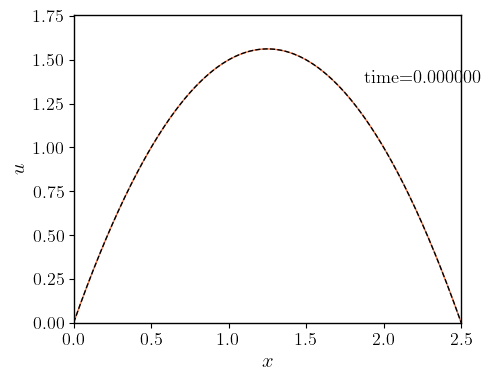

In [6]:
address = 'Data/'+nameZip+'.npz'
figData = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False, gridspec_kw=dict(hspace=0.0, wspace=.13))
dvideo = mod.Visualization(address, figData)

n0 = 0
dataname = '.data'
nameV = 'video_quadratic'
xmin, xmax, ls, lw, color = xi[0], xi[-1], '-', 1, '#f0784d'
struc = [xmin, xmax, ls, lw, color]

Sol_exact = lambda x, t: x*(xmax-x)*(1 + 0.5*t)
dvideo.video(n0, dataname, struc, nameV, solEx=Sol_exact, show=False)